### 1. Download CFEDemands python moduel
#### Estimation of Constant Frisch Elasticity (CFE) demand systems. 

In [3]:
!pip install CFEDemands --pre


    100% |████████████████████████████████| 51kB 1.2MB/s ta 0:00:011
You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### 2. Dataset including HH expenditures and Characteristics. 


 - Turn Google sheet to  `pandas` dataframes

 - If dataset has more than 5 million cells, you want to manage the size
 
 - j = HH Id
 - t = Year 
 - m = indicator of market, region identifier

In [4]:
Sheets = {'Ethiopia':'1aUK6OO2jfIXIEP-lopqXRvU4lGW-hyE-CIhBYcQyY8U',
         # 'Your dataset':'Your google spreadsheet key',
         }
Sheets

{'Ethiopia': '1aUK6OO2jfIXIEP-lopqXRvU4lGW-hyE-CIhBYcQyY8U'}

In [5]:
#load data and create tables

import pandas as pd
import numpy as np

# The function below adapted from Gianmario Spacagna's suggestion at
# https://stackoverflow.com/questions/19611729/getting-google-spreadsheet-csv-into-a-pandas-dataframe
def dataframe_from_gspreadsheet(sheet_name, key):
    """Transform public google spreadsheet into pandas.DataFrame."""
    
    url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
        key=key, sheet_name=sheet_name.replace(' ', '%20'))

    df = pd.read_csv(url)

    return df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)


In [6]:
# Change 'ICRISAT' to key of your own sheet in Sheets, above
x = dataframe_from_gspreadsheet("Expenditures", Sheets['Ethiopia'])

# Change 'ICRISAT' to key of your own sheet in Sheets, above
z = dataframe_from_gspreadsheet("HH", Sheets['Ethiopia'])

# Assume a single market: (Comment this out to make each village its own market)
z['m'] = 1
x['m'] = 1

# Take logs of expenditures; call this y
y = np.log(x.replace(0,np.nan).set_index(['j','t','m']))

z.set_index(['j','t','m'],inplace=True)

In [7]:
z.head()

,,,Girls,Boys,Women,Men,logHsize
j,t,m,,,,,
1010101601002,2015,1,0,0,1,0,0.000000
1010101601017,2015,1,4,2,1,2,0.954243
1010101601034,2015,1,0,0,1,0,0.000000
1010101601049,2015,1,2,0,1,0,0.477121
1010101601064,2015,1,0,0,1,1,0.301030


In [8]:
y.head()

,,,Field Pea,Banana,Barley,Beef,Beer,Boye/Yam,Bula,Butter/ghee,Cassava,Chat / Kat,...,Salt,Soft drinks/Soda,Sorghum,Sugar,Sweet potato,Tea,Teff,Tella,Tomato,Wheat
j,t,m,,,,,,,,,,,,,,,,,,,,,
1010101601002,2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.945910,NaN
1010101601017,2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.218876,NaN,NaN,2.302585,NaN
1010101601034,2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.916291,NaN,NaN,4.605170,NaN,NaN,NaN,NaN,2.484907,NaN
1010101601049,2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.916291,NaN,4.787492,2.995732,NaN,NaN,NaN,NaN,2.639057,NaN
1010101601064,2015,1,NaN,NaN,NaN,4.60517,NaN,NaN,NaN,NaN,NaN,NaN,...,0.916291,2.302585,NaN,2.302585,NaN,NaN,NaN,1.386294,2.484907,NaN


## Estimation


### 1. Reduced Form

a. Create a Result object with lots of different attributes 

In [9]:
import cfe

In [10]:
result = cfe.Result(y=y,z=z)

This created complicated result object with lots of different attributes. 
We are focusing on things like 
    - i : food item
    - j : HH ID
    - K : HH Characteristic 
    - M : region 
    - t : year
We only have data of y and z

In [11]:
result

<xarray.Result>
Dimensions:           (i: 33, j: 4951, k: 5, m: 1, t: 1)
Coordinates:
  * j                 (j) int64 1010101601002 1010101601017 ... 15010203102121
  * m                 (m) int64 1
  * t                 (t) int64 2015
  * i                 (i) <U28 'Field Pea' 'Banana' ... 'Tomato' 'Wheat'
  * k                 (k) <U8 'Girls' 'Boys' 'Women' 'Men' 'logHsize'
Data variables:
    alpha             object None
    beta              object None
    delta             object None
    prices            object None
    characteristics   (k, j, t, m) float64 0.0 4.0 0.0 ... 0.6021 0.301 0.6021
    loglambdas        object None
    a                 object None
    yhat              object None
    ce                object None
    cehat             object None
    e                 object None
    delta_covariance  object None
    se_delta          object None
    se_beta           object None
    se_alpha          object None
    se_a              object None
    y           

Data tells us that there is 33 goods and 4951 HH. 

### 2.1 Estimation of $\delta$ and $a_{it}$

1) first step of estimation is estimating the "reduced form" linear regression. 
$$
y_{it}^j = {a}_{it} + \delta_i'{z}^j_t + \epsilon_{it}^j.
$$

We will use Result class code to estimate this 

In [12]:
#estimating 38 differeent amount of demographic composition
result.get_reduced_form()

/srv/app/venv/lib/python3.6/site-packages/cfe/estimation.py:363: UserWarning: No variation in: (2015, 1)
  warnings.warn("No variation in: %s" % str(constant))
/srv/app/venv/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
/srv/app/venv/lib/python3.6/site-packages/cfe/estimation.py:363: UserWarning: No variation in: (2015, 1)
  warnings.warn("No variation in: %s" % str(constant))


coef of $\delta$,After running this:

In [13]:

result.delta.to_dataframe().unstack('k')

#for example in Ethiopia
# there was negative affect that amount of Boys and Girls on cosumption relative to average
#positive affect means larger consumption 
#saw similar patterns in males and females
        
#log Heize :log exp on log House size (of we can 1% in HH size, we % increase in total exp in this food)
#tells rela of house compostition and conusmption patter within diff households 

delta                                        
k                                 Boys     Girls       Men     Women  logHsize
i                                                                             
Banana                       -0.047912 -0.035967  0.118957  0.119732  0.047092
Barley                       -0.023413  0.028450  0.038026  0.145111  0.552942
Beef                         -0.054140 -0.005259  0.139204  0.099525  0.486804
Butter/ghee                   0.059732  0.101717  0.218253  0.175350 -0.801475
Chat / Kat                    0.024963  0.040189  0.161590 -0.091966  0.259267
Chick Pea                     0.009872 -0.008678  0.026295  0.050089  0.911610
Coffee                       -0.010705  0.023517  0.080429  0.093755 -0.005764
Eggs                         -0.051675 -0.048321  0.048465  0.084931  0.579965
Field Pea                     0.026322 -0.010146  0.081057  0.107604  0.510814
Goat & mutton meat           -0.145623 -0.106081 -0.155897  0.034462  1.623166
Green chili pepper (kariya)  -0.024461  0.014617  0.074220  0.085025  0.152404
Greens (kale, cabbage, etc.)  0.036689  0.036571  0.097632  0.108294 -0.119268
Haricot Beans                 0.155338  0.093195  0.161933  0.118017  0.029867
Horsebeans                    0.039836  0.004683  0.083597  0.064751  0.403561
Lentils                      -0.001482 -0.004033  0.072182  0.066188  0.539520
Maize                         0.174001  0.157430  0.102664  0.081715  0.194430
Milk                          0.042858  0.046750 -0.027539 -0.011716  0.957252
Oils (processed)             -0.067201 -0.044237  0.047777  0.077956  0.584059
Onion                        -0.055890 -0.023965  0.040622  0.089775  0.487170
Orange                       -0.075780 -0.171897  0.055037  0.144490  0.423837
Pasta/Maccaroni               0.141030  0.106238  0.126372  0.081255 -0.340160
Potato                        0.005501  0.001164  0.047200  0.022382  0.508288
PuUrchased Injera             0.066730  0.010100  0.216751  0.047539 -0.640866
Purchased Bread or Biscuits   0.020922 -0.035904  0.120332  0.038565  0.511138
Red pepper (berbere)         -0.067547 -0.047519  0.068458  0.111952  0.354674
Salt                          0.047007  0.027118  0.048073  0.019047  0.334495
Soft drinks/Soda             -0.012970  0.021115  0.054041  0.014944  0.356809
Sorghum                       0.133382  0.147087  0.122562 -0.078926  0.197469
Sugar                         0.009793  0.051819  0.033109  0.050313  0.564012
Tea                           0.097841  0.089070  0.079769  0.061431 -0.147625
Teff                         -0.087279 -0.099196  0.055680  0.056817  1.403080
Tomato                       -0.015074 -0.005610  0.057657  0.073789  0.323330
Wheat                         0.038591  0.006699  0.057326 -0.028370  1.131830

Also the good-time constants $a_{it}$:


In [14]:
result.a.to_dataframe().unstack('i')
#first food among year. average comp is higher in early days 
#Increased over years 
#this data can't be used because we only have one year 

a                                                      \
i         Banana    Barley     Beef Butter/ghee Chat / Kat Chick Pea   
t    m                                                                 
2015 1  2.212213  2.284247  4.04279    3.492621   4.133427  2.103492   

                                                           ...     \
i         Coffee      Eggs Field Pea Goat & mutton meat    ...      
t    m                                                     ...      
2015 1  2.750175  2.568307  2.382898           4.266266    ...      

                                                                   \
i      Purchased Bread or Biscuits Red pepper (berbere)      Salt   
t    m                                                              
2015 1                    2.230097             2.667805  0.650191   

                                                                           \
i      Soft drinks/Soda   Sorghum     Sugar       Tea      Teff    Tomato   
t    m                                                                      
2015 1          3.03663  2.849053  2.089897  1.344229  3.700515  2.142052   

                  
i          Wheat  
t    m            
2015 1  2.827564  

[1 rows x 33 columns]

### 2.2 Estimation of $e_{it}^j$ 

Using Singular Value Decompsition, we ranked one matrix that approximates best the residuals. 
This can be interpreted as $$
    -\beta_i\log\lambda^j_t,
$$
where the $\log\lambda^j_t$  is log of MUE (marginal uility of expenditure) for HH j at time t, and $\beta_i$ are the corresponding &ldquo;Frisch elasticities&rdquo;

This tells us how much demand changes as MUE falls. 

In [17]:
result.get_beta().to_dataframe()
#look at residual and find app of these things and just on good i (how food demand repsonce to changes to this Q so larger tha lamba, the hh is neeedy)
#Beta is income elasticity 
#largre number means larger elasticity 
# we see that every product has postiive income elasticity except Cassava dry  (eat a lot)

,beta
i,
Field Pea,0.412204
Banana,0.581326
Barley,0.458713
Beef,0.404562
Butter/ghee,0.580861
Chat / Kat,0.520538
Chick Pea,0.351258
Coffee,0.346862
Eggs,0.342007


### 3. Assessment of Fit


Let's compare total expenditures predicted by the model we’ve estimated with actual total expenditures:

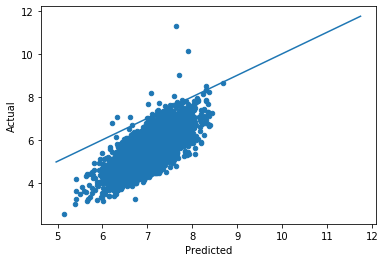

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])
#total expenditure expected line seems start higher than actual data,
